In [361]:
#Load the packages in the tidyverse into the current R session
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import data

In [362]:
data = pd.read_csv("Capstone_data_NCAA_Academic_Progress_data_clean.csv")

In [363]:
#Cleaning up the data so machine learning will work:

#Add a column with a numerical code for NCAA conference
data['NCAACONF_ID'] = data['NCAA_CONFERENCE'].astype('category').cat.codes

In [364]:
#Multiply all the Retention and Eligibility columns by 1000 so they are numerically the same as APR

columns_to_multiply = ['FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION','2014_ELIGIBILITY', '2014_RETENTION', 
'2013_ELIGIBILITY', '2013_RETENTION', 
'2012_ELIGIBILITY', '2012_RETENTION',
'2011_ELIGIBILITY', '2011_RETENTION',
'2010_ELIGIBILITY', '2010_RETENTION',
'2009_ELIGIBILITY', '2009_RETENTION',
'2008_ELIGIBILITY', '2008_RETENTION',
'2007_ELIGIBILITY', '2007_RETENTION',
'2006_ELIGIBILITY', '2006_RETENTION',
'2005_ELIGIBILITY', '2005_RETENTION',
'2004_ELIGIBILITY', '2004_RETENTION']

data[columns_to_multiply] = data[columns_to_multiply]*1000

In [365]:
print(data.loc[:,['FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION', 
'2014_ELIGIBILITY', '2014_RETENTION', 
'2013_ELIGIBILITY', '2013_RETENTION', 
'2012_ELIGIBILITY', '2012_RETENTION',
'2011_ELIGIBILITY', '2011_RETENTION',
'2010_ELIGIBILITY', '2010_RETENTION',
'2009_ELIGIBILITY', '2009_RETENTION',
'2008_ELIGIBILITY', '2008_RETENTION',
'2007_ELIGIBILITY', '2007_RETENTION',
'2006_ELIGIBILITY', '2006_RETENTION',
'2005_ELIGIBILITY', '2005_RETENTION',
'2004_ELIGIBILITY', '2004_RETENTION']])

      FOURYEAR_ELIGIBILITY  FOURYEAR_RETENTION  2014_ELIGIBILITY  \
0                   902.00              953.60            976.20   
1                   886.10              961.30            810.80   
2                   917.70              988.00            916.70   
3                   794.90              846.20            875.00   
4                   883.30              982.90            882.40   
...                    ...                 ...               ...   
5792                982.40              986.70           1000.00   
5793               1000.00             1000.00           1000.00   
5794                970.00              978.30           1000.00   
5795                974.00              982.50           1000.00   
5796               1000.00             1000.00           1000.00   

      2014_RETENTION  2013_ELIGIBILITY  2013_RETENTION  2012_ELIGIBILITY  \
0             976.20            871.80          948.70            854.20   
1             979.70           

In [366]:
data.head()

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
0,100654,Alabama A&M University,0,2014,1,Baseball,1,Southwestern Athletic Conference,80,931,...,948.70,21,917,881.00,952.40,20,975,975.00,975.00,27
1,100654,Alabama A&M University,0,2014,4,Football,1,Southwestern Athletic Conference,321,932,...,963.00,74,921,875.90,965.50,74,871,860.10,881.10,27
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,Southwestern Athletic Conference,43,964,...,846.20,11,909,909.10,909.10,10,950,950.00,950.00,27
3,100654,Alabama A&M University,0,2014,6,Men's Golf,1,Southwestern Athletic Conference,22,898,...,888.90,7,929,857.10,1000.00,5,896,857.40,909.40,27
4,100654,Alabama A&M University,0,2014,14,"Men's Track, Indoor",1,Southwestern Athletic Conference,62,932,...,916.70,14,926,851.90,1000.00,12,938,916.70,958.30,27


# Machine Learning in progress

# MLA Complete

Coefficients: [ 4.29780525e-01  4.36326579e-01 -4.47618170e-06 -4.33847406e-01
  9.66168074e-03]
Intercept: 134.97224135940564
R-squared for train: 0.9097959600846576
R-squared for test: 0.9051215661331359
RMSE train: 5.698128916727835
RMSE test: 6.194602962131593
MSE train: 32.46867315164993
MSE test: 38.373105858449506


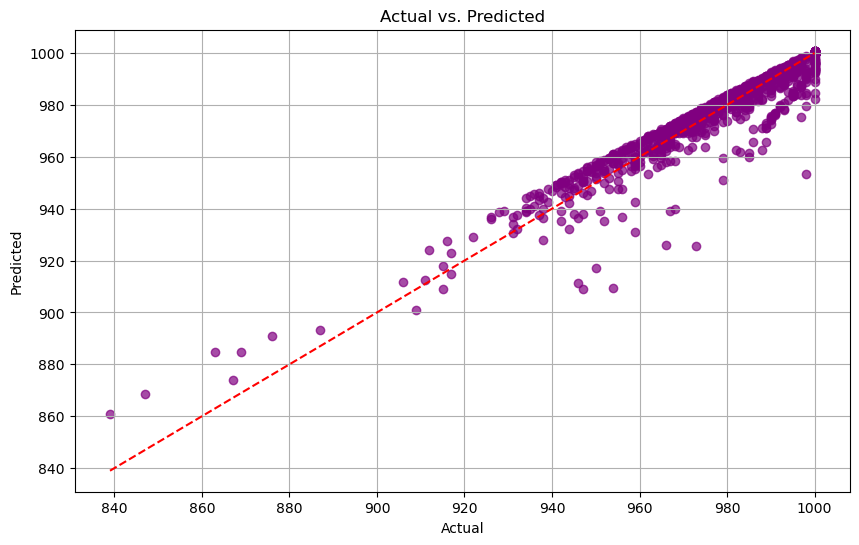

In [384]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Define the features and target variable
X = data[['FOURYEAR_ELIGIBILITY','FOURYEAR_RETENTION', 'SCHOOL_ID', 'SCHOOL_TYPE', 'NCAACONF_ID']] # Replace with your feature columns
y = data['FOURYEAR_SCORE'] # Replace with your target column

# Split the data into training and testing sets (split training and testing data into 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared for train:", linear_regression.score(X_train, y_train))
print("R-squared for test:", model.score(X_test, y_test)) #R2 score of 1.0 indicates that the estimator perfectly predicts the dependent variable's value, given the indepedent variables value.
print("RMSE train:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE test:",np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MSE train:", metrics.mean_squared_error(y_train,y_train_pred))
print("MSE test:", metrics.mean_squared_error(y_test, y_test_pred))

# Visualize the results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color ='red', linestyle='--',label ='Prediction Line')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.grid(True)
plt.show()

## Different Models: Random Forest Classifier, Gradient Boosting Classifier, SVC, KNeighbors Classifier

In [275]:
#Load the dataset
X = data[['SCHOOL_TYPE','FOURYEAR_ELIGIBILITY','FOURYEAR_RETENTION','SCHOOL_ID', 'NCAACONF_ID']]
y = data[['FOURYEAR_SCORE']]

#Split the data into training and testing models
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                   random_state=42)

In [276]:
#Define models
models = {
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'svc': SVC(),
    'knn': KNeighborsClassifier()
    
}

In [387]:
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel()) #covert the array to (n,) (i.e. flatten it)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'{name} Accuracy/R2:{accuracy}')

rfc Accuracy/R2:0.38275862068965516
gbc Accuracy/R2:0.3775862068965517
svc Accuracy/R2:0.13706896551724138
knn Accuracy/R2:0.13275862068965516


## Keep this

In [306]:
import seaborn as sns

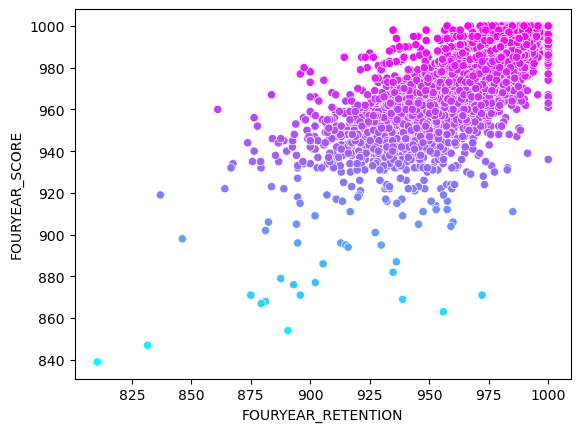

In [307]:
axes = sns.scatterplot(data=data, x=('FOURYEAR_RETENTION'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='cool', legend=False)

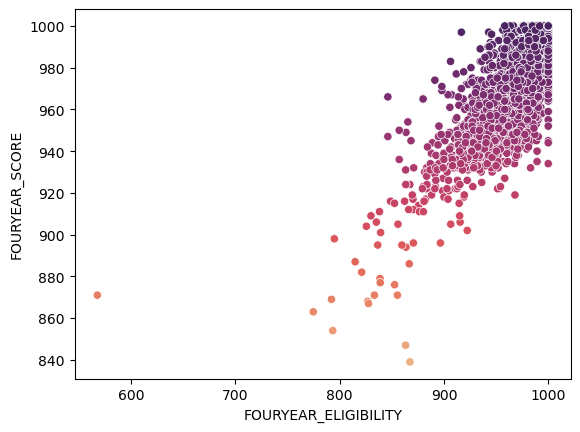

In [308]:
axes = sns.scatterplot(data=data, x=('FOURYEAR_ELIGIBILITY'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='flare', legend=False)

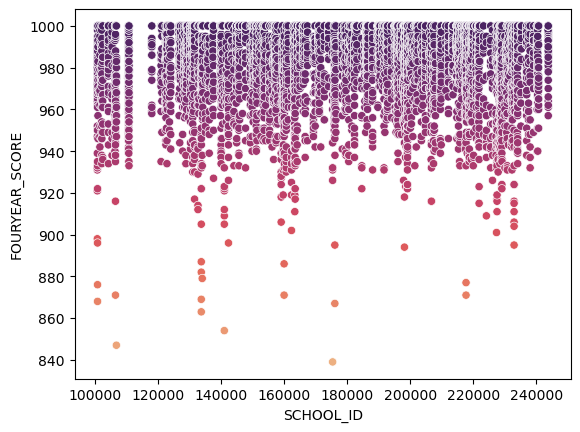

In [309]:
axes = sns.scatterplot(data=data, x=('SCHOOL_ID'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='flare', legend=False)

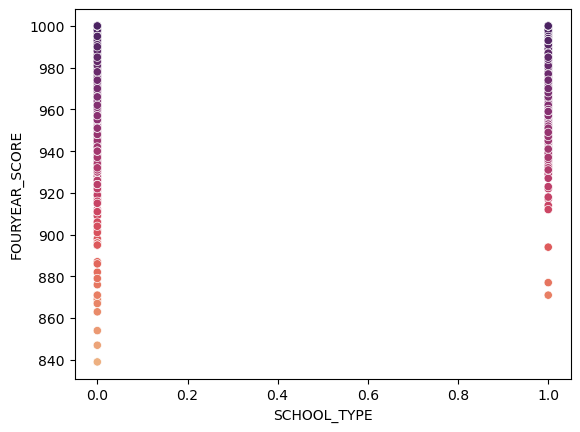

In [310]:
axes = sns.scatterplot(data=data, x=('SCHOOL_TYPE'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='flare', legend=False)

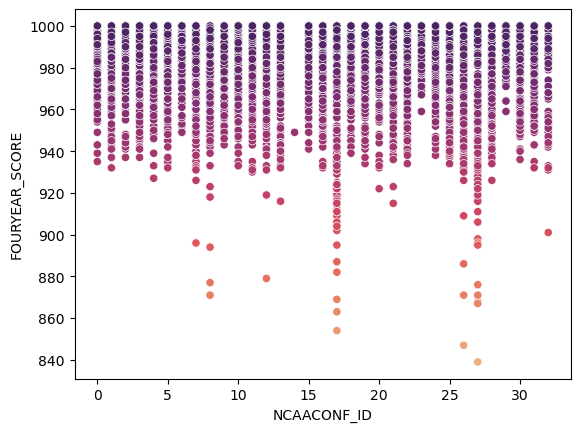

In [311]:
axes = sns.scatterplot(data=data, x=('NCAACONF_ID'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='flare', legend=False)

## Keep this - K-nearest neighbors regression

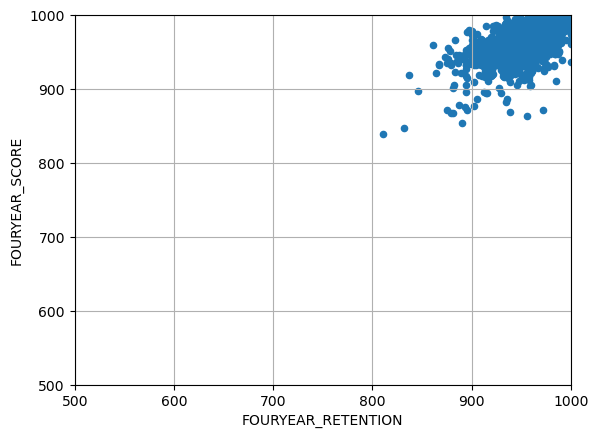

[[981.66666667]]


In [302]:
#k-neartest neighbors regression
#Setting variables
X = data[['FOURYEAR_RETENTION']].values
y = data[['FOURYEAR_SCORE']].values

#Visualize the data
data.plot(kind='scatter', grid=True,
         x='FOURYEAR_RETENTION', y='FOURYEAR_SCORE')
plt.axis([500,1000,500,1000])
plt.show()

#Select a linear model
model = KNeighborsRegressor(n_neighbors=3)

#Train the model
model.fit(X,y)

#Make a prediction
X_new = [[970]] #Retention
print(model.predict(X_new)) 


# MLA not working